# Lasso & Ridge with Linear Regression

In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

In [3]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
data = pd.DataFrame(boston.data, columns= boston.feature_names)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
X = data.drop(['Price'], axis=1)
y = data["Price"]

# LINEAR REGRESSION
Works on OLS(Ordinary Least Square)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

Selecting important features

In [11]:
lin_model = SelectFromModel(LinearRegression())
lin_model.fit(X,y)
lin_model.estimator_.coef_
lin_col = lin_model.get_support()

In [12]:
lin_col

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False])

In [13]:
features = X.columns[lin_col]
features

Index(['CHAS', 'NOX', 'RM'], dtype='object')

In [14]:
lin_X = data[features]
lin_y = data['Price']

Model

In [15]:
#splitting data
from sklearn.model_selection import train_test_split
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(lin_X, lin_y, test_size = 0.2, random_state = 0)

#Linear Regression
model1 = LinearRegression()
model1.fit(Xtrain1, ytrain1)

model1.predict(Xtest1)

array([24.70169621, 19.93398466, 27.4248448 , 11.54671793, 24.40029643,
       18.92839573, 18.49570304, 20.52466306, 11.84152903, 23.94173523,
       16.76941414, 24.25525057, 18.50655284,  5.76182439, 37.73468318,
       31.76029698, 22.35720624, 33.65736614, 25.30389781, 19.92949162,
       24.71493224, 17.80198646, 21.6968354 , 26.19552892, 19.71302931,
        0.93308796, 19.9862442 , 10.47437325, 39.05555081, 20.81058588,
       20.06371004, 17.01062449, 24.48598274, 23.49520296, 24.25412451,
       17.90362173, 16.69868227, 20.76537024, 22.0506512 , 20.54866786,
       23.55240261, 20.55284795, 23.17548734, 14.61341114, 25.07659688,
       25.2111059 , 20.83106722, 18.27815078,  3.9657788 , 26.54194293,
       18.4638799 , 16.55332346, 20.87555894, 40.9028221 , 16.38397102,
       19.68551782, 20.13263155, 21.59140541, 16.98758927, 25.4535259 ,
       22.17139608, 21.04723334, 30.54610577, 25.48648627, 17.01233732,
       27.0166545 , 21.64577736, 23.62620528, 25.82991052, 20.48

In [16]:
print(model1.score(Xtrain1, ytrain1))
print(model1.score(Xtest1, ytest1))

0.5777796687926771
0.4555232995389753


In [17]:
import matplotlib.pyplot as plt
plt.plot(range(len(model1.fit(Xtrain1,ytrain1).coef_)),model1.fit(Xtrain1,ytrain1).coef_)
plt.ylabel('Coefficient')
plt.show()

<Figure size 640x480 with 1 Axes>

# RIDGE REGRESSION
Works on OLS(Ordinary Least Square) + (alpha)^2

In [18]:
from sklearn.linear_model import Ridge

Selecting important features

In [19]:
ridge_model = SelectFromModel(Ridge(alpha=0.3))
ridge_model.fit(X,y)
ridge_model.estimator_.coef_
ridge_col = ridge_model.get_support()

In [20]:
ridge_col

array([False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False])

In [21]:
features = X.columns[ridge_col]
features

Index(['CHAS', 'NOX', 'RM'], dtype='object')

In [22]:
rid_X = data[features]
rid_y = data['Price']

Model

In [23]:
#splitting data
from sklearn.model_selection import train_test_split
Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(rid_X, rid_y, test_size = 0.2, random_state = 0)

#Ridge Regression
model2 = Ridge()
model2.fit(Xtrain2, ytrain2)

model2.predict(Xtest2)

array([24.36204719, 20.22259674, 27.17082182, 11.9322144 , 23.95761187,
       18.80457562, 18.5533744 , 20.33511489, 11.60371669, 23.84047639,
       17.19847647, 24.48526312, 19.22731963,  6.06314714, 37.91556784,
       31.30608682, 22.27546226, 33.25734042, 25.18719682, 19.66068772,
       24.51487534, 17.93890755, 21.55144262, 25.8303598 , 19.2246387 ,
        0.84814908, 19.88322103, 11.59033569, 38.93476083, 20.76176858,
       20.28309543, 17.58798302, 24.01964968, 22.99672497, 24.11678534,
       18.39129425, 17.18546455, 20.87864146, 22.18243378, 20.65092198,
       23.09304876, 20.08096788, 22.80583358, 14.59898019, 24.98920467,
       24.9194713 , 20.31821287, 19.19962651,  4.95378456, 26.49180327,
       19.389007  , 16.58125268, 20.64646529, 40.75923832, 16.57323582,
       19.51747196, 19.60984617, 21.11460994, 17.07472216, 24.90319455,
       21.57511547, 20.99040191, 30.20735695, 25.34804183, 17.0281797 ,
       26.62540662, 22.31426137, 23.53563195, 26.09088033, 20.18

In [24]:
print(model2.score(Xtrain2, ytrain2))
print(model2.score(Xtest2, ytest2))

0.5757436681367277
0.46404894322335466


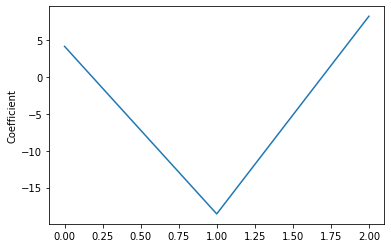

In [25]:
plt.plot(range(len(model2.fit(Xtrain2,ytrain2).coef_)),model2.fit(Xtrain2,ytrain2).coef_)
plt.ylabel('Coefficient')
plt.show()

# LASSO REGRESSION
Works on OLS(Ordinary Least Square) + |alpha|

In [26]:
from sklearn.linear_model import Lasso

Selecting important features

In [27]:
lasso_model = SelectFromModel(Lasso(alpha=0.3))
lasso_model.fit(X,y)
lasso_model.estimator_.coef_
lasso_col = lasso_model.get_support()

In [28]:
lasso_col

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [29]:
features = X.columns[lasso_col]
features

Index(['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
       'LSTAT'],
      dtype='object')

In [30]:
las_X = data[features]
las_y = data['Price']

Model

In [31]:
#splitting data

from sklearn.model_selection import train_test_split
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(las_X, las_y, test_size = 0.2, random_state = 0)

#Lasso Regression
model3 = Lasso()
model3.fit(Xtrain3, ytrain3)

model3.predict(Xtest3)

array([24.32008838, 23.87887628, 27.40967915, 14.67466972, 20.50565292,
       22.56085525, 20.59348122, 23.97596171, 21.76817009, 20.09976332,
        9.08691382, 12.92815989, 17.13314471,  8.22266395, 35.17364287,
       31.60600242, 21.35802875, 35.4089826 , 29.9905209 , 24.65276823,
       25.51799391, 25.93192114, 19.85995983, 29.60649327, 23.96376461,
       17.47716922, 19.56314806, 23.02385588, 30.84125553, 19.79976254,
       16.96782   , 19.08573257, 22.6564866 , 24.73467975, 28.39206935,
       19.40772878, 10.11668503, 23.90911192, 15.40802576, 12.22059545,
       25.99999603, 21.14405407, 22.69455058, 16.13131091, 24.01575017,
       25.86456816, 20.59562612, 24.10854919, 13.62687714, 23.21363458,
       22.31066194, 17.19845755, 24.86488044, 27.2536788 , 15.25688213,
       22.20929778, 22.58900769, 18.08348302, 18.11636523, 19.71955136,
       22.50170917, 22.29840089, 31.01074144, 30.44672475, 17.88692384,
       31.68073672, 17.53301775, 19.43073156, 15.0839034 , 23.15

In [32]:
print(model3.score(Xtrain3, ytrain3))
print(model3.score(Xtest3, ytest3))

0.7170467166597749
0.48789271561192593


# Comparision Plot

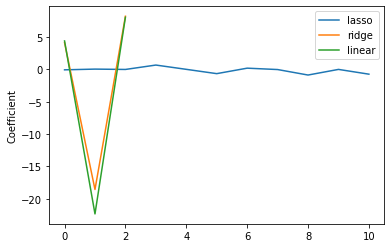

In [37]:
plt.plot(range(len(model3.fit(Xtrain3,ytrain3).coef_)),model3.fit(Xtrain3,ytrain3).coef_)
plt.ylabel('Coefficient')
plt.plot(range(len(model2.fit(Xtrain2,ytrain2).coef_)),model2.fit(Xtrain2,ytrain2).coef_)
plt.plot(range(len(model1.fit(Xtrain1,ytrain1).coef_)),model1.fit(Xtrain1,ytrain1).coef_)
plt.legend(['lasso','ridge','linear'])
plt.show()

Learn more at https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression